<a href="https://colab.research.google.com/github/rituraj009/rituraj009-Restaurants-Dataset-EDA/blob/main/restaurants_EDA_(RITURAJ_SINGH).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries necessory to run the code**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Code to read csv file into Colaboratory**

In [6]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

**Authenticate and creating the PyDrive client**

In [7]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Loading the dataset (resturant.csv) file from google drive**

In [227]:
link = 'https://drive.google.com/file/d/1HoGyUrI3rPFh1mCDXaAFGnR0cqx1E-0_/view?usp=share_link'
# to get the id part of the file
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('restaurants.csv')
df = pd.read_csv('restaurants.csv')
df.head()  # it will show first 5 rows of the datasets

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [228]:
# Showing various rows & columns
df.shape  


(51717, 17)

**Listing various different columns**

In [230]:
# This will provide the list of all the columns
df.columns 

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

**Upon examination of the dataset, it has become clear that there is an excessive number of columns present. These superfluous columns do not contribute to the data analysis process and can be removed to optimize the dataset for analysis.**

In [231]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


**Now, getting some additional information about the dataset we are working on such as the number of non-null values present and the data types present within each column, This can aid in understanding the structure and integrity of the data.**

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


# Changing the name of some columns for better viewing/understanding of the dataset

1. **approx_cost(for two people) --> Cost2plates**  
2. **listed_in(type) --> Type** 

In [233]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type'}, inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


# Removing Duplicate Rows from the Datasets

**Reasons**
1. Can introduce inaccuracies and bias into the analysis.
2. Can skew the results and make the findings less reliable.
3. Duplicate data can also take up unnecessary space and slow down the processing time.
4. Removing them ensures that the dataset is clean and accurate. 



In [234]:
#it will remove (51717-51609 = 108 rows )
df.drop_duplicates(inplace = True)
df.shape  

(51609, 11)

# Now, cleaning the data column wise. 
**Starting with rate column**


In [235]:
#listing out unique values first
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

**As we can see, rate column should contain interger/float values intead of having characters in it. 
Therefore removing**
1. '/'
2. '-'
3. 'NEW'

In [236]:
# Creating a function
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

**Now, handling the null values in rate column**
**--> Replacing the missing data with a mean value.**

In [237]:
#first showing the number of null values
df.rate.isnull().sum()

10019

In [238]:
#Replacing null values with mean values
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['rate'].isnull().sum()

0

**Looking at dataset again**

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51609 non-null  object 
 1   online_order     51609 non-null  object 
 2   book_table       51609 non-null  object 
 3   rate             51609 non-null  float64
 4   votes            51609 non-null  int64  
 5   location         51588 non-null  object 
 6   rest_type        51382 non-null  object 
 7   cuisines         51564 non-null  object 
 8   Cost2plates      51265 non-null  object 
 9   Type             51609 non-null  object 
 10  listed_in(city)  51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


**Now Dropping null-values from other columns as the number of rows with null-values is not very large.**

In [240]:
df.dropna(inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


**Looking at dataset again**

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51042 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51042 non-null  object 
 1   online_order     51042 non-null  object 
 2   book_table       51042 non-null  object 
 3   rate             51042 non-null  float64
 4   votes            51042 non-null  int64  
 5   location         51042 non-null  object 
 6   rest_type        51042 non-null  object 
 7   cuisines         51042 non-null  object 
 8   Cost2plates      51042 non-null  object 
 9   Type             51042 non-null  object 
 10  listed_in(city)  51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


**As we can see, there are two columns that deals with locations informations :-**
1. location
2. listed_in(city)

**So removing one of these will be favourable, in order to find which one of these should be removed. We need to find number of uniques values in these columns.**

In [242]:
#Uniques values in location column
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [243]:
##Uniques values in listed_in(city) column
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

**As it is easily evident that number of unique values in location column is greater than listed_in(city) column therefore, removing listed_in(city) column is more suitable.**

In [244]:
df = df.drop(['listed_in(city)'], axis = 1)

**Now, Cleaning cost2plates column by removing ',' from the data values.**

In [245]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
    
df['Cost2plates'] = df['Cost2plates'].apply(handlecomma)
#Now listing uniques values of cost2plates column
df['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

**Now, Cleaning rest_type column.**
1. Listing uniques values.
2. Now looking at data output.
3. rest_type contains information about the resturants, therefore in order to clean this datasets more, it will be more favourable to cluster the resturants having very less counts. 


In [246]:
rest_types = df['rest_type'].value_counts(ascending  = False)
rest_types

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

**Clustering resturants having counts less than 900 into others category.**

In [247]:
rest_types_lessthan900 = rest_types[rest_types<900]
rest_types_lessthan900

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

**Putting resturants with counts less than 900 represented by rest_types_lessthan100 into others category using a function**

In [248]:
def handle_rest_type(value):
    if(value in rest_types_lessthan900):
        return 'others'
    else:
        return value
        
df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

**Similarly cleaning location column**

Listing locations with count less than 250 into others. 

In [249]:
#displaying locations less than 250
location = df['location'].value_counts(ascending  = False)
location_lessthan250 = location[location<250]
location_lessthan250

Wilson Garden                    246
Bommanahalli                     236
Koramangala 3rd Block            215
Thippasandra                     191
Kumaraswamy Layout               191
Nagawara                         187
Basaveshwara Nagar               187
Seshadripuram                    165
Hennur                           159
Majestic                         155
HBR Layout                       153
Infantry Road                    150
Race Course Road                 139
City Market                      122
Yeshwantpur                      119
ITPL Main Road, Whitefield       113
Varthur Main Road, Whitefield    109
South Bangalore                  107
Koramangala 2nd Block            102
Kaggadasapura                    101
Hosur Road                        98
CV Raman Nagar                    89
Vijay Nagar                       78
RT Nagar                          78
Sanjay Nagar                      76
Sadashiv Nagar                    63
Sahakara Nagar                    53
K

In [250]:
#grouping all these locations by creating a new parameter others
def handle_location(value):
    if(value in location_lessthan250):
        return 'others'
    else:
        return value
        
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

BTM                      5056
others                   4099
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

**Similarly, cleaning cuisines column**
1. listing cuisines counts.
2. creating a cuisines_lessthan100 to hold cuisines counts less than 100. 
3. with the help of a function, putting cuisines with counts less than 100 into others.
4. listing cuisines column after all these operations 


In [251]:
#1
cuisines = df['cuisines'].value_counts(ascending  = False)
cuisines

North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: cuisines, Length: 2704, dtype: int64

In [252]:
#2
cuisines_lessthan100 = cuisines[cuisines<100]
cuisines_lessthan100

North Indian, Continental, Chinese          97
Juices                                      94
Fast Food, North Indian                     93
Bengali, North Indian                       93
Beverages, Juices                           90
                                            ..
North Indian, Chinese, Oriya, Mithai         1
Beverages, Burger                            1
North Indian, Mughlai, Lucknowi              1
Continental, Thai, North Indian, Chinese     1
North Indian, Chinese, Arabian, Momos        1
Name: cuisines, Length: 2635, dtype: int64

In [253]:
#3
def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value

In [254]:
#4
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

# **# Now we can view the cleaned data**

# **Problem statement** 
**1. Preprocess, clean, and analyze the given dataset**

Solution :-

Below is the cleaned data, and analysis done 

In [255]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet




---



# **# Visualizing Book Table For Solving Problem Statements**

**Displaying Top 20 restaurants**  

In [256]:
#top 20 restaurant 
df['name'].value_counts(ascending=False)[:20]

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Pizza Hut            62
Domino's Pizza       60
Sweet Truth          60
KFC                  60
Beijing Bites        60
Subway               60
McDonald's           59
Smoor                59
Faasos               57
Chef Baker's         56
Lassi Shop           56
Name: name, dtype: int64

**Using seaborn's the countplot() function to create a bar plot that shows the frequency of occurrences of each category in a categorical variable ('name')**

(**Visualization 1**)



Text(0.5, 1.0, 'Top 20 restaurants')

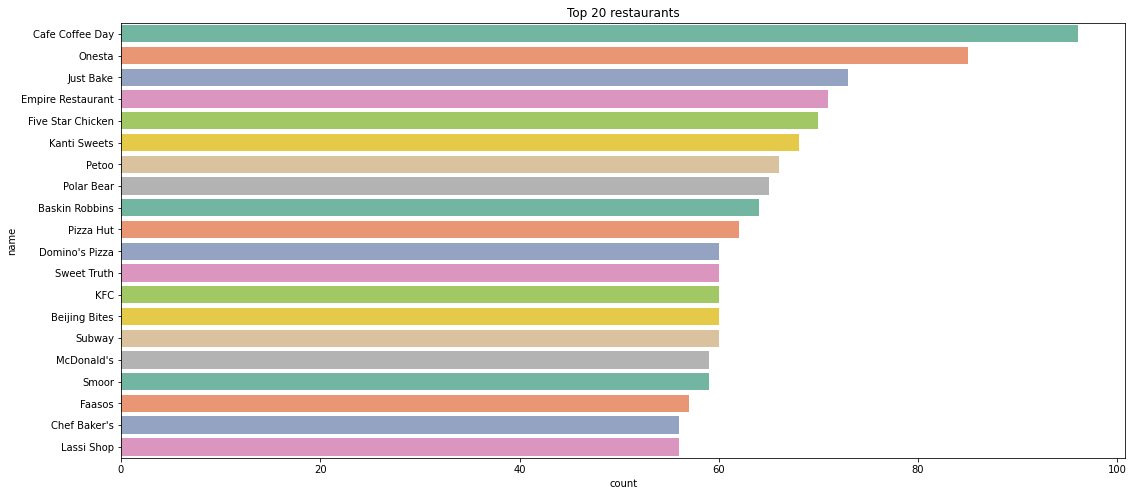

In [257]:
top_20_restaurants = df['name'].value_counts(ascending=False)[:20]

#creates a figure with the specified size (18 inches wide, 8 inches tall), 
plt.figure(figsize=(18,8)) 
sns.countplot(y='name', data=df, order=top_20_restaurants.index,palette='Set2')
plt.title("Top 20 restaurants")

**Data Visualization Insights**

1. Based on the data, it appears that Cafe Coffe Day and Onesta have a high number of ordered restaurants in Banglore City. 

2. Additionally, popular food chains like Just Bake, Emprie Resturant, Five Star Chicken, Pizza Hut, Domino's Pizza, KFC, can also be found in the area.



---



# **Ploting Number of Resturants at Various Locations of Banglore**

(**Visualization 2**)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

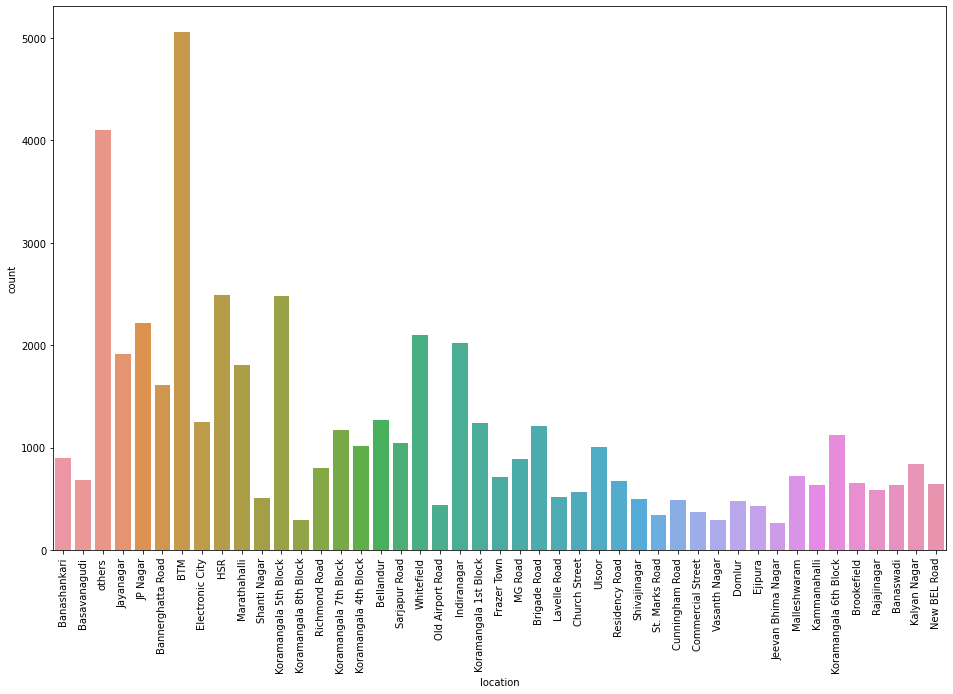

In [258]:
plt.figure(figsize = (16,10))
ax = sns.countplot(df['location'])
plt.xticks(rotation=90)

**Data Visualization Insights**

1. From the above plot of data, it can be observed that locations such as BTM, HSR, Koramangala, etc. have a high density of restaurants, leading to high competition from a customer acquisition perspective.

2. Therefore, it is highly advisable to avoid these areas when launching new restaurants.

3. Locations like, Commerical Street, Domlur are good options for launching new resturants. 

**Displaying Top 20 restaurant types (Visualization 3)**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


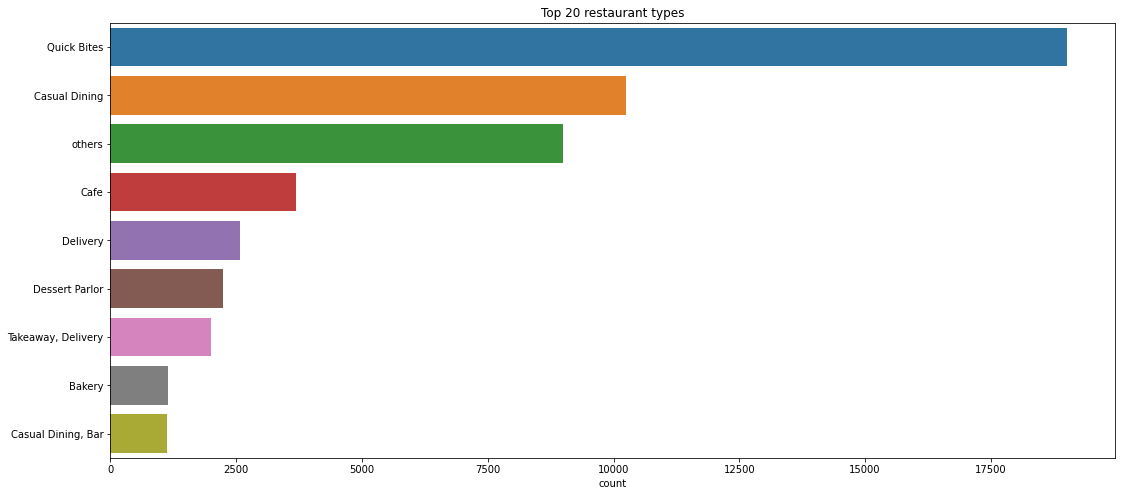

In [259]:
plt.figure(figsize=(18,8))
rest = df['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Top 20 restaurant types")
plt.xlabel("count")
plt.show()


**Data Visualization Insights**

It is clear that restaurant types such as Quick Bites, Casual Dining, and Cafe are among the most prevalent in the city of Bangalore. **Therefore, it would be highly advisable to open a restaurant in these genres to increase the chances of success.**"



---



# Displaying 
1.  **Top 5 Most Voted Resturants** 
2.  **Top 5 Most Expensive Resturants** **(Visualization 4)**


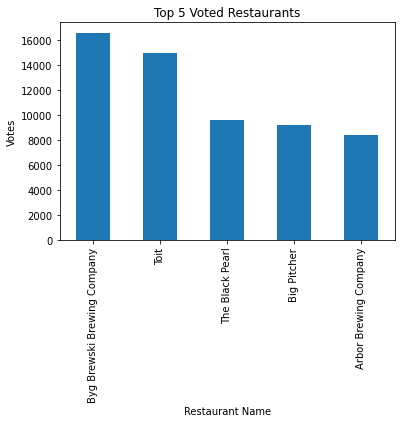

In [260]:
#1 --Top 5 Most Voted Resturants
df_01 = df.copy()
top_5_voted = df_01.groupby('name')['votes'].mean().sort_values(ascending=False).head(5)
top_5_voted.plot(kind='bar', y='votes')
plt.xlabel('Restaurant Name')
plt.ylabel('Votes')
plt.title('Top 5 Voted Restaurants')
plt.show()




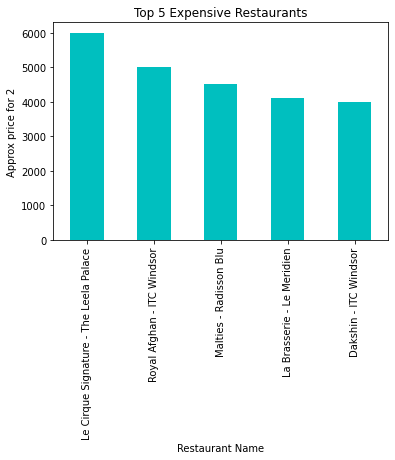

In [261]:
#2 --Top 5 Most Expensive Resturants
df_02 = df.copy()
top_5_voted = df_02.groupby('name')['Cost2plates'].mean().sort_values(ascending=False).head(5)
top_5_voted.plot(kind='bar', y='votes', color= 'c')
plt.xlabel('Restaurant Name')
plt.ylabel('Approx price for 2')
plt.title('Top 5 Expensive Restaurants')
plt.show()



---



# **Visualizing Online Order (Yes vs No)** **(Visualization 5)**

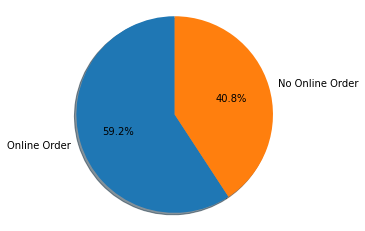

In [262]:
df_03 = df.copy()
# data for the chart
labels = ['Online Order', 'No Online Order']
sizes = [df_03['online_order'].value_counts()['Yes'], df_03['online_order'].value_counts()['No']]

# creating the chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Data Visualization Insights**

Based on the data, it appears that, almost 60% of all the orders are made online rest 40% are offline orders.



---



# **Visualizing Table Booking** **(Visualization 6)**

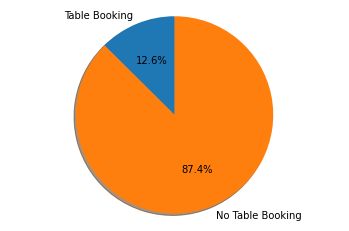

In [263]:
df_05 = df.copy()
# data for the chart
labels = ['Table Booking', 'No Table Booking']
sizes = [df_05['book_table'].value_counts()['Yes'], df_05['book_table'].value_counts()['No']]

# creating the chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Data Visualization Insights**

Based on the data, it appears that, 12% resturants provide the facility of table booking, and rest 87% resturant doesnt allow tablel booking. 

Resons 

1. It is only avaible in upper class 5 start hotels.
2. Lack of a dedicated reservation system or staff to manage reservations.
3. A desire to maintain a more casual, walk-in atmosphere.
4. Health and safety concerns, such as not wanting to have a full restaurant during a pandemic.



---



# **Visualizing Online Order Facility, Location Wise** **(Visualization 7)**

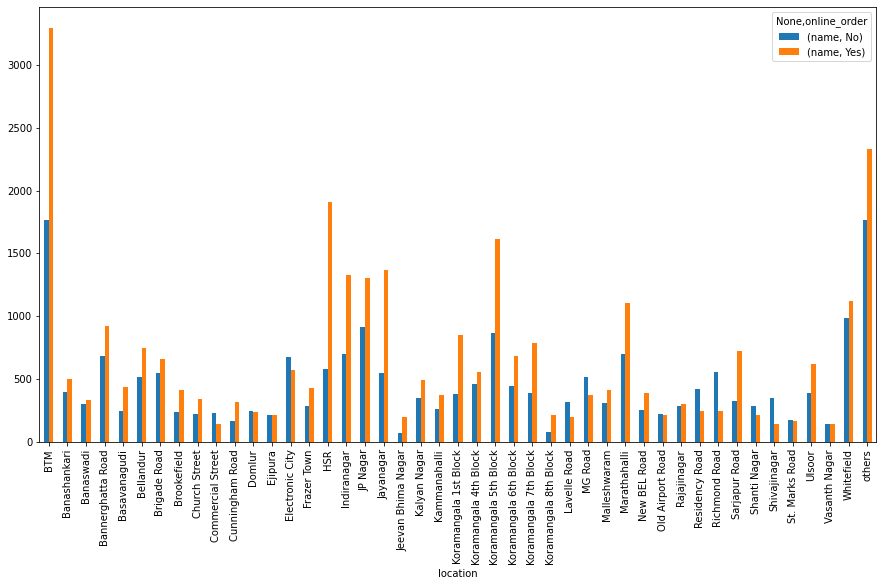

In [264]:
df_06 = df.groupby(['location','online_order'])['name'].count()
df_06.to_csv('location_online.csv')
df_06 = pd.read_csv('location_online.csv')
df_06 = pd.pivot_table(df_06, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df_06.plot(kind = 'bar', figsize = (15,8))

**Data Visualization Insights**

The data visualization of resturant locations and their online ordering capabilities has revealed that Electronic City has a high number of restaurants without online ordering options. This suggests that there may be less competition in terms of online ordering in this area, and thus opening a new restaurant in this location with online ordering capabilities, high scalability could potentially increase the chances of success in terms of customer acquisition, resulting in long termn high return rates.



---



# **Visualizing Top Cuisines (Most Popular)** **(Visualization 8)**


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


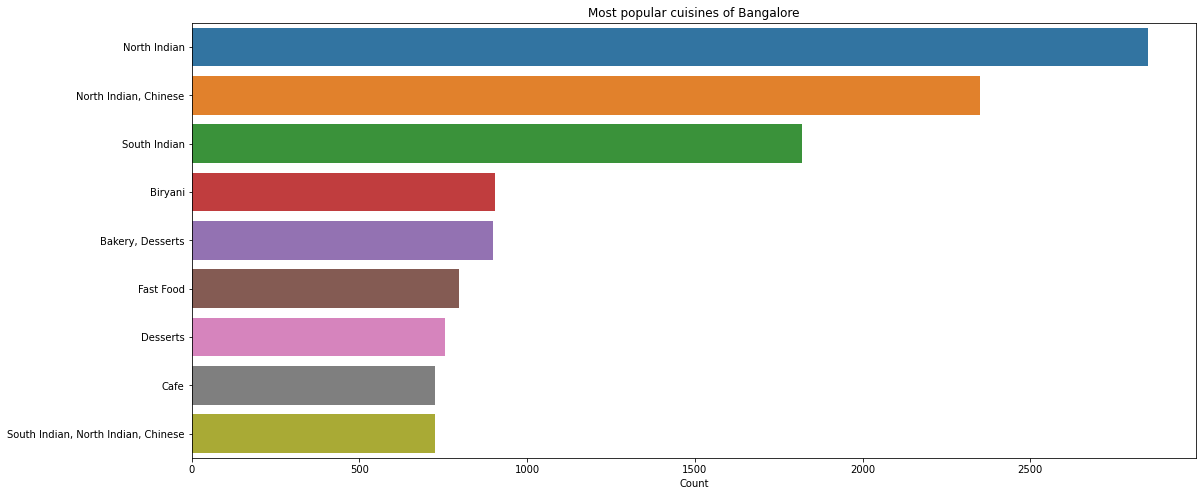

In [265]:
plt.figure(figsize=(18,8))
cuisines=df['cuisines'].value_counts()[1:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")
plt.show();

**Data Visualization Insights**

The bar graph above illustrates that the most sought-after types of cuisine in Bengaluru are North Indian, Chinese, and South Indian. Therefore, it would be beneficial for new or struggling restaurants to focus on these types of cuisine in order to increase their popularity, ratings, votes, customer base, and ultimately, their profit margins.



---



# **Comparison of different localities by the type of restaurant** **(Visualization 9)**

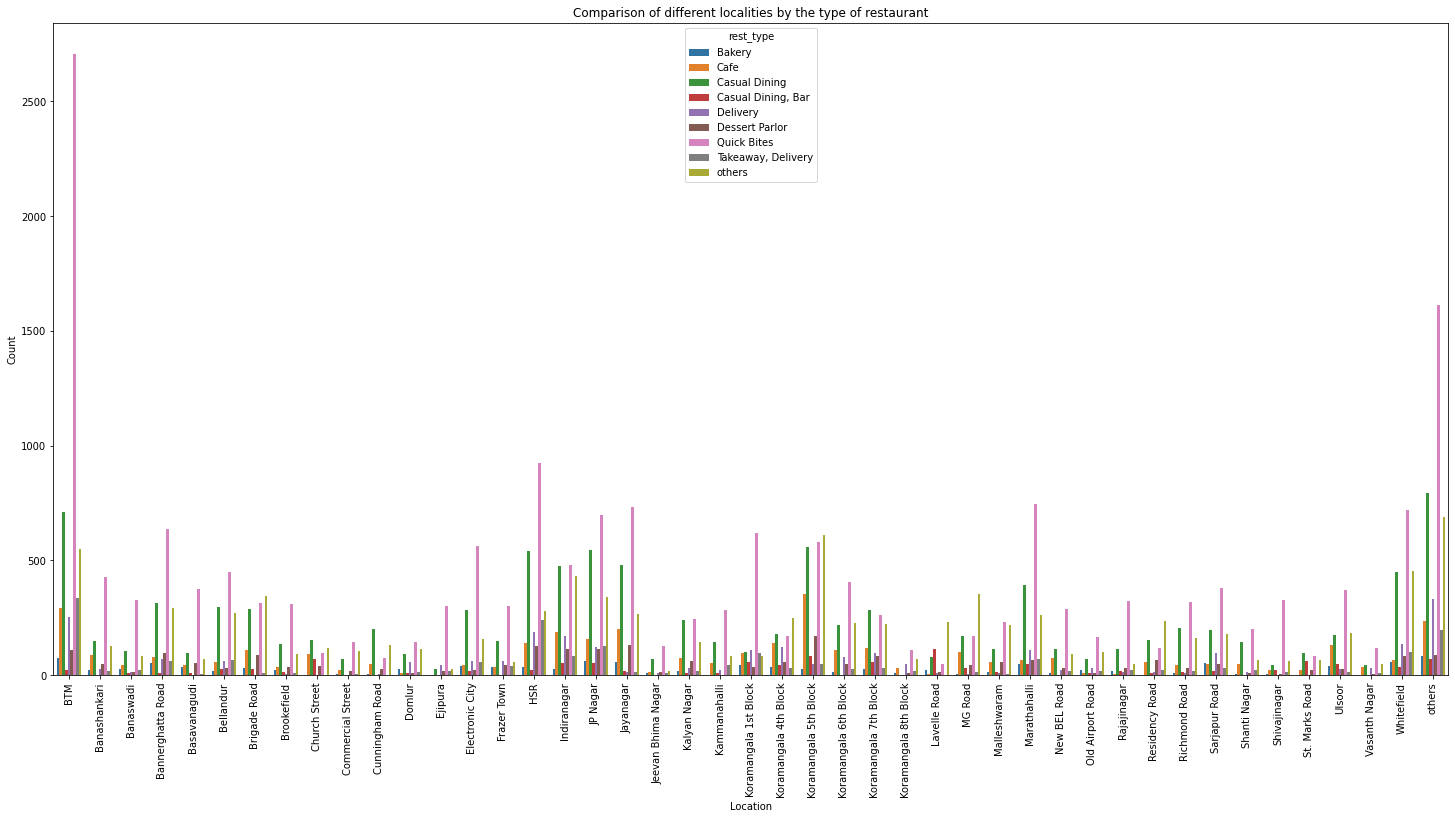

In [266]:
# Creating a copy of the original DataFrame
df_07 = df.copy()

# Creating a new column 'count' that contains the count of each type of restaurant for each locality
df_07 = df_07.groupby(['location','rest_type']).size().reset_index(name='count')

# Creating a stacked bar chart to compare different localities by the type of restaurant
plt.figure(figsize=(25,12))
sns.barplot(x='location', y='count', hue='rest_type', data=df_07)
plt.title("Comparison of different localities by the type of restaurant")
plt.xlabel("Location")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.show()



# **Problem Statement** 
**2. How would you consider a restaurant to be successful?**

**Data Visualization Insights**

Solution :- 

**I would consider a resturant to be successful if** **it had all of these or most of these functionality.**

1) Online order --Yes.

2) Table Booking --Yes.

3) Should have (North Indian, Chinese, South Indian Cuisines).

4) Should belong to non-common type of resturant in a hot zone area so as to provide uncommon attraction to the customers.

5) Good/high rating & Votes.

# **Problem Statement** 
**3. What kind of restaurant do you have to start in order to be successful?**

**Data Visualization Insights**

Solution :-

1. Resturants type like Quick Bites, Cassual Dining, Cafe are most popular to start with as the number of these are high, so restaurant owners should focus on launching these type of resturants in location where they are not frequently available. 

2. Resturants should have at least these top 3 cuisines (North Indian, Chinese, South Indian).

3. Resturants in order to be successful in long terms, should be able to provide the facility of online_order, table_booking for attracking both (offline/online) Customers. 

# **Problem Statement** 
**4. Is it possible to compare different localities by the type of restaurant in the area?**

**Data Visualization Insights**

Solution :-


Yes it is possible to compare different localities by the type of restaurant in the area. Above is the visualization approach to this problem. 

From the bar chart above, I have come up with followinfg insights.

1) BTM is the location where most of the resturants are available. 

2) Quick Bites is the most popular type of resturant in this location. 

3) If someone wants to launch new resturant, then from above chart it is clearly visible, they should go with that type of resturants which are not in high frequency/number like (bakery, cafe) type of resturants. They will attract more customer compared to other types of resturants. 

4) Similarly, we can find the type of resturant that are high in number, and launch only that type of resturants, which are low in number resulting in high success. 





---



# **Problem Statement** 
**5. What kind of extra information can you provide using your understanding
of the dataset?**



Solution :- 

**a) Visualization 1**
--> Cafe Coffe day, Onesta, Just Bake are the top best known resturants in Banglore. 


**2) Visualization 2**
--> BTM, HSR, Koramangla 5th Block are some hot zones of resturants in banglore.

**3) Visualization 3**
--> Quick Bites, Castual Dining are some othe mostly available type of resturant. 

**4) Visualization 4**
--> Brewski Brewing Company, The black pearl, Bit Pitcher are the some of the high voted resturants in banglore. 

--> Royal Afgan- ITC Windsor, The Leela Palace, Malities Raddison are some of the most expensice resturants in banglore. 

**5) Visualization 5**
--> Around 60 % resturants in banglore provide online_order facility compared to 40 % resturants who dont.

**6) Visualization 6**
--> In shocking revealing from the EDA process conducted on dataset.

**7) Visualization 7**
--> BRT hostest resturant zone in banglore (has wide range of both types of resturants providing facility of both online and offline order.
--> Location (Electronic City has least number of resturants with online facility). Therefore, resturants capable of managing high order of online ordering can benefit from launching resturant in this location. 


**8) Visualization 8**
--> North Indian, Chinese, South Indian Cuisines are the most popular cuisines available in banglore resturants. 

**9) Visualization 9**
--> From visualization we know that BTM is hottest zone for resturants in banglore, having Quick bites types of resturants the most. 
--> Less type of resturants avaliable in this location are (Cafe, Backery, Casual Dining). 
--> Therfore newly launched resturants should focus on this type of genre. 

# **Impact of Order type on Rating** **(Visualization 10)**

# **Problem Statement** 
**6. What is the impact of the ratings on the sales segregated based on an
order type?**


Solution :-

As we can see from the above visualization of data (box plot, resturants that **provide online order facility** are among the **higest rated resturants in Banglore**. 
It can be also taken as, the customer who order from online are the only customer (majority group) that end up rating the resturant. On contradictory to resturants that doesnt provide online order facility. 

However it should also be noted that the overall mean of Online_order (Yes and No) vs rating, difference is not much.But still, the upper end of Online_order (Yes) is more compared to Order_online(No), indicating that Online_order (yes) results in leaving more impact on rating.  

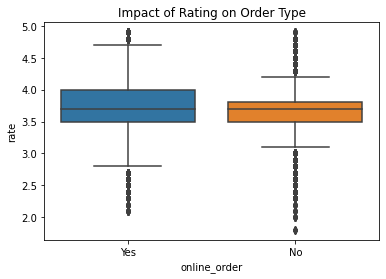

In [267]:
# creating a boxplot of ratings by order type
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Impact of Rating on Order Type')
plt.show()




---



# **Top five least-performing restaurants (Based on Rating)**

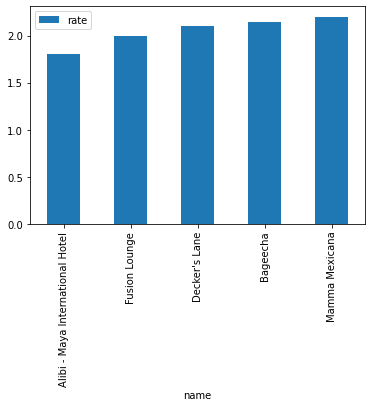

In [268]:
df_08 = df.copy()
group_name = df_08.groupby('name').mean()
group_name.sort_values(by='rate')[:5].plot(kind='bar', y='rate')


# **Problem Statement** 
**7. In a certain scenario five least-performing restaurants will have to shut
their operations. Based on the data provided, what parameters will help
them boost their sales? How & why**


Solution :-

Following paramerters will boost their sales

**1) Using Visualization 3 (Displaying Top 20 restaurant types )**

--> It is evident that resturant types like (Quick Bite, Cafe Coffe, Casual Dining) are more the popular type of resturants, therefore, these underperforming resturants should add items of these items. 

**2) Using Visualization 8 (Displaying Most popular cuisines of Banglore)**


--> It is evident that resturants serving (North Indian, Chinese, South Indian) dishes/cuisines should be added in the serving menu of these resturants. 

**3) Using Visualization 5 (Order_type --online(yes/no) and visualization 6 (Table_booked--yes/no)**

--> As it already found in the EDA process, most of resturants provide online order facility, these under performing resturants should add online-order facility if they dont have it already. 

--> Also, resturants having table-booking facility is very less 15%. Therefore these under-performing resturants should add this table-booking facility to add more customer base. 


**Other ways to boost the sales for these least five performing restaurants, there are a few parameters that could be considered:**

1. Offering discounts or promotions to attract more customers.
2. Improving the quality of the food and service.
3. Expanding the menu with more options that appeal to customers.
4. Investing in marketing and advertising to increase awareness.
5. Analyzing customer feedback and making changes based on the feedback.